# Phase I: Exploration


In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.__version__

2022-07-29 13:01:59.011606: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-29 13:01:59.015115: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-29 13:01:59.015124: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.9.1'

In [2]:
tf.random.set_seed(42)

In [3]:
import numpy as np
np.__version__

'1.23.1'

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20

In [6]:
# https://github.com/AndreasMadsen/python-lrcurve
# !pip install -q lrcurve

In [7]:
from lrcurve import KerasLearningCurve

# Step 1: Loading and exploring our data set

In [8]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/openknowledge/mlops-data2day/main/data/reference.csv', delimiter=';')

In [9]:
df.head()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group_name,group
0,0,41.951100,0,40.933328,122.238329,54.789454,3.687598,high,0
1,0,24.368286,1,44.797317,113.765298,22.721796,2.438415,medium,1
2,0,18.314649,1,41.587241,143.427269,41.789709,4.071157,high,0
3,0,51.265254,1,47.266716,111.578133,58.099978,5.103095,high,0
4,0,23.578861,0,42.835319,145.994235,33.945468,3.746175,high,0


In [10]:
df.describe()

,training,age,emergency_breaking,braking_distance,power,miles,risk,group
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.210000,35.146663,0.394000,39.903294,134.888089,44.353678,2.182728,0.901333
std,0.407444,12.765348,0.488798,4.781834,35.048570,15.954705,2.482060,0.816523
min,0.000000,15.949545,0.000000,24.368993,38.246253,5.406535,-5.294372,0.000000
25%,0.000000,25.141921,0.000000,36.733165,110.008660,32.681212,0.716449,0.000000
50%,0.000000,32.714683,0.000000,39.867888,131.055019,41.975416,2.390982,1.000000
75%,0.000000,42.633629,1.000000,42.938777,157.319959,53.660247,3.866224,2.000000
max,1.000000,86.213394,1.000000,56.463472,285.750164,126.116466,10.342066,2.000000


In [11]:
import seaborn as sns

In [12]:
labels = ["High Risk", "Medium Risk", "Low Risk"]
markers = ['v', 'd', '^']
# colors = ['#FF8080', '#FFFF80', '#8080FF']
colors = ['#FF0000', '#FFFF00', '#0000FF']

In [13]:
features = ['training', 'age', 'emergency_breaking', 'braking_distance', 'power', 'miles', 'risk']

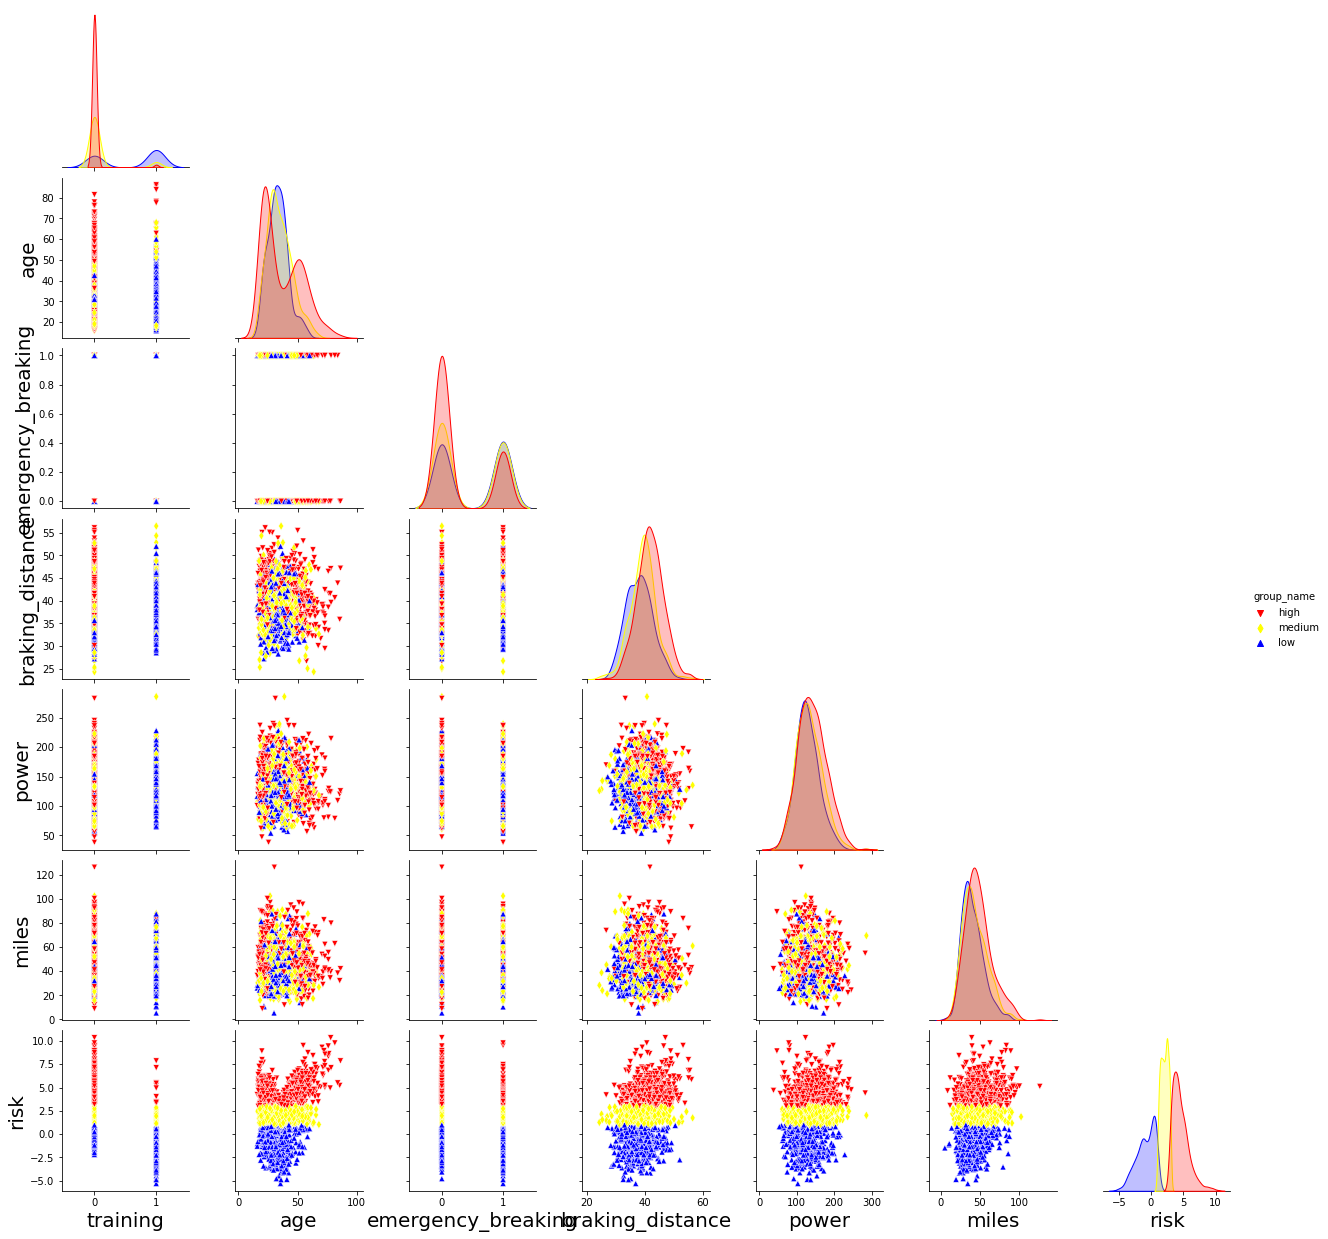

In [14]:
sns.pairplot(df, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers,
             vars=features);

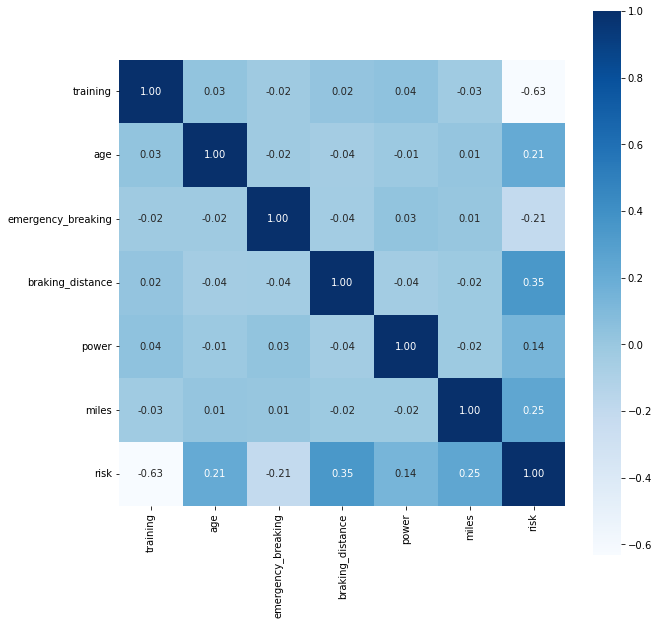

In [15]:
plt.figure(figsize=(10, 10))

cm = df.corr()
cm3 = cm.iloc[:len(features), :len(features)]

hm = sns.heatmap(cm3,
                cbar=True,
                annot=True,
                square=True,
                cmap='Blues', 
                fmt='.2f',
                yticklabels=features,
                xticklabels=features)

# Step 2: Training a neural network

In [16]:
y = df['group'].values
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([581, 486, 433]))

In [17]:
# df.columns

In [18]:
X = df.drop(['risk', 'group', 'group_name'], axis='columns').values
# simplify to 2 dimensions to make this more interpretable
# X = df[['age', 'power']].values
X.shape, y.shape

((1500, 6), (1500,))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1200, 6), (300, 6), (1200,), (300,))

## Normalization

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization

In [20]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [21]:
normalizer.adapt(X_train)

2022-07-29 13:02:07.363586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-29 13:02:07.363662: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-29 13:02:07.363687: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-BEN73DP): /proc/driver/nvidia/version does not exist
2022-07-29 13:02:07.364086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
X_train.mean(axis=0), X_train.std(axis=0)

(array([  0.21333333,  35.22185997,   0.39166667,  39.88238087,
        135.5319176 ,  44.22145729]),
 array([ 0.40966111, 12.65456719,  0.48812282,  4.82057359, 35.28609461,
        16.03940555]))

In [23]:
normalizer.weights

[<tf.Variable 'mean:0' shape=(6,) dtype=float32, numpy=
 array([  0.21333331,  35.221855  ,   0.39166665,  39.882385  ,
        135.53189   ,  44.221462  ], dtype=float32)>,
 <tf.Variable 'variance:0' shape=(6,) dtype=float32, numpy=
 array([1.6782223e-01, 1.6013806e+02, 2.3826385e-01, 2.3237928e+01,
        1.2451079e+03, 2.5726245e+02], dtype=float32)>,
 <tf.Variable 'count:0' shape=() dtype=int64, numpy=1200>]

In [24]:
normalizer.mean, np.sqrt(normalizer.variance)

(<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
 array([[  0.21333331,  35.221855  ,   0.39166665,  39.882385  ,
         135.53189   ,  44.221462  ]], dtype=float32)>,
 array([[ 0.4096611, 12.654567 ,  0.4881228,  4.8205733, 35.286087 ,
         16.039404 ]], dtype=float32))

In [25]:
from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                                    BatchNormalization, Activation

num_features = X.shape[1]
dropout = 0.7
model = tf.keras.Sequential()

model.add(InputLayer(name='input', input_shape=(num_features,)))
model.add(normalizer)

model.add(Dense(100, name='hidden1'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(100, name='hidden2'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(100, name='hidden3'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(name='output', units=3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 hidden1 (Dense)             (None, 100)               700       
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 hidden2 (Dense)             (None, 100)               1

In [26]:
%%time 

BATCH_SIZE = 32
# BATCH_SIZE = 64
EPOCHS = 50

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    callbacks=[KerasLearningCurve()],
                    verbose=0)

CPU times: user 19.7 s, sys: 8.57 s, total: 28.2 s
Wall time: 11.4 s


In [27]:
train_loss, train_metric = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE)
train_loss, train_metric

38/38 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8558


(0.39335665106773376, 0.8558333516120911)

In [28]:
test_loss, test_metric = model.evaluate(X_val, y_val, batch_size=BATCH_SIZE)
test_loss, test_metric

10/10 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8700


(0.36951860785484314, 0.8700000047683716)

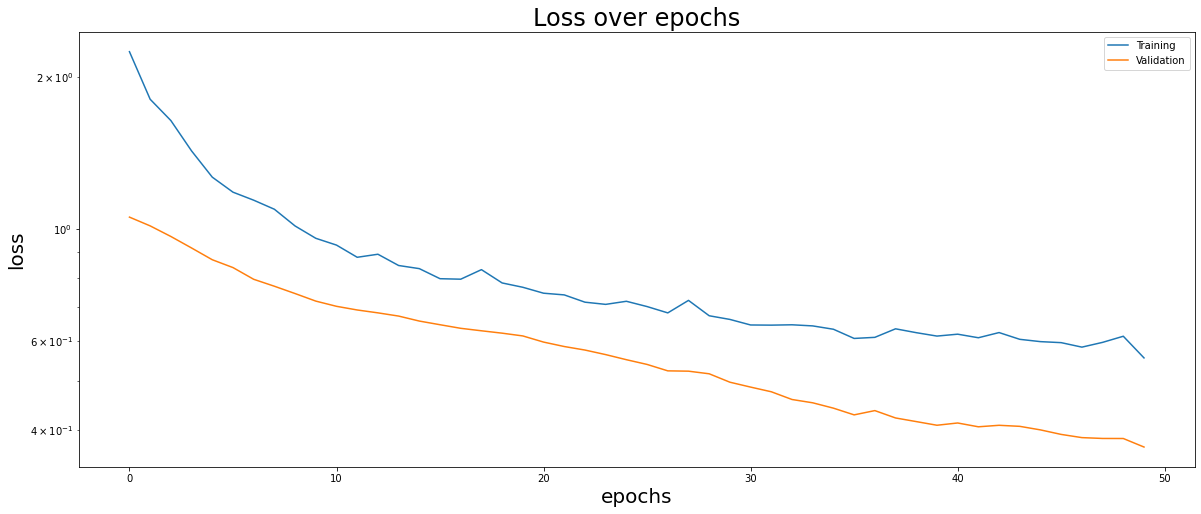

In [29]:
plt.yscale('log')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title('Loss over epochs')

plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

plt.legend(['Training', 'Validation']);

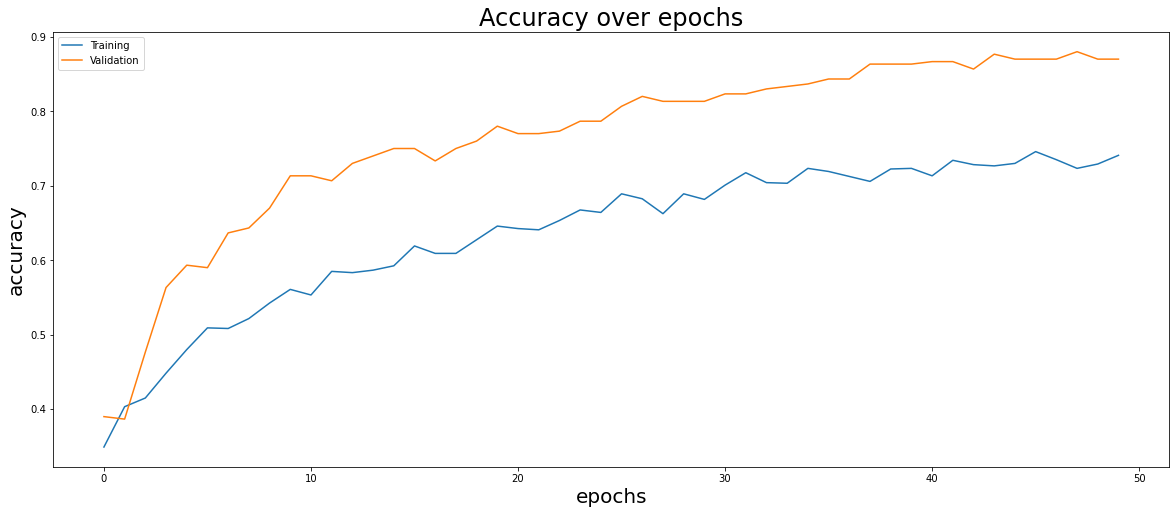

In [30]:
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.title('Accuracy over epochs')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation']);

# Invariant Properties of Model

## Accuracy range and lack of overfitting

In [31]:
assert train_metric > .85

In [32]:
assert test_metric > .85

In [33]:
assert train_metric - test_metric < .05

## Invariants of the model itself (without using data on it)
Could be
* effective depth of tree (if decision tree has been used as architecture instead of NN)
* distribution of weights
* actual normalization

**We do use these properties as we want to treat the model as a black box to make it interchangable**

# Invariants also useful for monitoring and analyzis - not using GT

In [34]:
y_pred = model.predict(X).argmax(axis=1)
y_pred.shape

47/47 [==============================] - 0s 3ms/step


(1500,)

In [35]:
# np.unique(y - y_pred, return_counts=True)

## Distribution of Output Class

In [36]:
values, counts = np.unique(y_pred, return_counts=True)
values, counts

(array([0, 1, 2]), array([558, 512, 430]))

In [37]:
# equal distribution around classes expected
tolerance = 0.15
expected_count = len(X) / 3
for count in counts:
    assert count in range(int(expected_count * (1 - tolerance)), int(expected_count * (1 + tolerance)))

In [38]:
range(int(expected_count * (1 - tolerance)), int(expected_count * (1 + tolerance)))

range(425, 575)

## Distribution of certainty

In [39]:
y_pred_probas = model.predict(X).max(axis=1)
y_pred_probas.shape

47/47 [==============================] - 0s 2ms/step


(1500,)

In [40]:
y_pred_probas.min(), y_pred_probas.mean(), y_pred_probas.max()

(0.459274, 0.74761736, 0.9997096)

In [41]:
assert y_pred_probas.min() > .4

In [42]:
assert y_pred_probas.mean() > 0.7

In [43]:
assert y_pred_probas.max() > 0.99

## In Monitoring both could be treated as a distribution and compared to the training reference

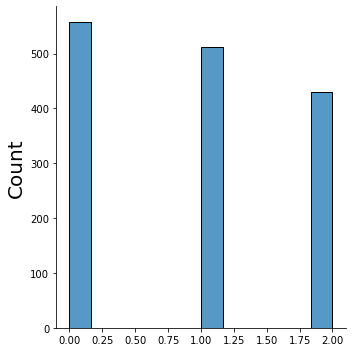

In [44]:
sns.displot(y_pred);

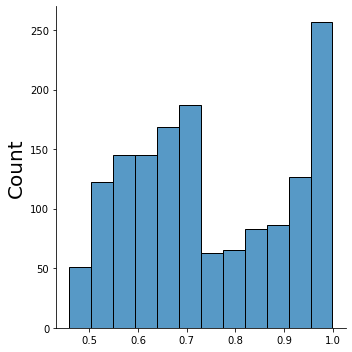

In [45]:
sns.displot(y_pred_probas);

## Since at this point we just this one dataset, we can try with train vs test

In [46]:
y_train_pred_probas = model.predict(X_train).max(axis=1)
y_test_pred_probas = model.predict(X_val).max(axis=1)

10/10 [==============================] - 0s 2ms/step


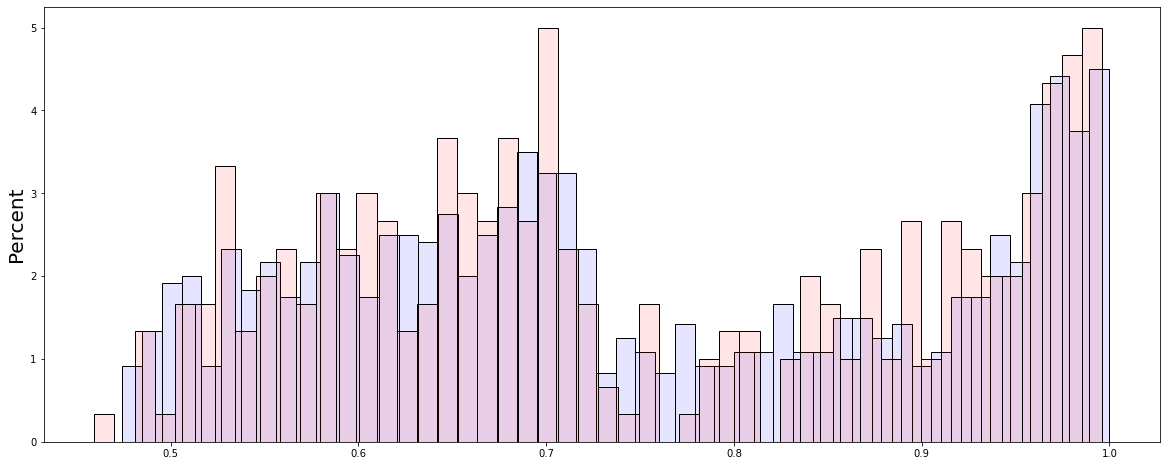

In [47]:
alpha=0.1
sns.histplot(y_train_pred_probas, color='blue', bins=50, stat='percent', alpha=alpha);
sns.histplot(y_test_pred_probas, color='red', bins=50, stat='percent', alpha=alpha);

In [48]:
y_train_pred = model.predict(X_train).argmax(axis=1)
y_test_pred = model.predict(X_val).argmax(axis=1)

10/10 [==============================] - 0s 2ms/step


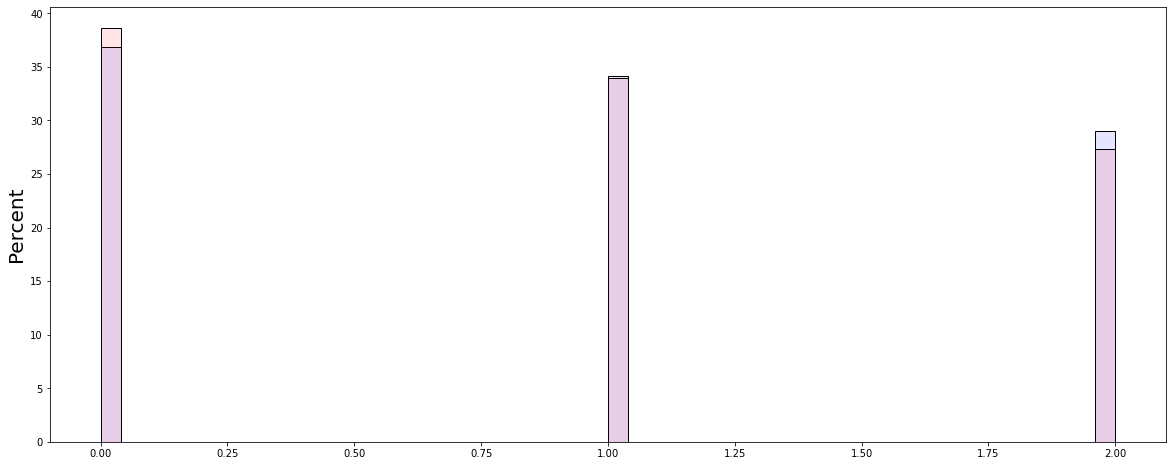

In [49]:
alpha=0.1
sns.histplot(y_train_pred, color='blue', bins=50, stat='percent', alpha=alpha);
sns.histplot(y_test_pred, color='red', bins=50, stat='percent', alpha=alpha);

## We can have a couple of statistical tests (more valuable in monitoring and real prod data)

In [50]:
from evidently.analyzers.stattests.jensenshannon import jensenshannon_stat_test
from evidently.analyzers.stattests.kl_div import kl_div_stat_test
from evidently.analyzers.stattests.ks_stattest import ks_stat_test
from evidently.analyzers.stattests.psi import psi_stat_test
from evidently.analyzers.stattests.wasserstein_distance_norm import wasserstein_stat_test

In [51]:
wasserstein_stat_test(y_train_pred_probas, y_test_pred_probas, 'num', threshold=None)

StatTestResult(drift_score=0.036963382554654485, drifted=False, actual_threshold=0.1)

In [52]:
ks_stat_test(y_train_pred_probas, y_test_pred_probas, 'num', threshold=None)

StatTestResult(drift_score=0.9368003350964889, drifted=False, actual_threshold=0.05)

In [53]:
psi_stat_test(pd.Series(y_train_pred_probas), pd.Series(y_test_pred_probas), 'num', threshold=None)

StatTestResult(drift_score=0.04292469008153967, drifted=False, actual_threshold=0.1)

In [54]:
jensenshannon_stat_test(pd.Series(y_train_pred), pd.Series(y_test_pred), 'cat', threshold=None)

StatTestResult(drift_score=0.015349817845049797, drifted=False, actual_threshold=0.1)

In [55]:
psi_stat_test(pd.Series(y_train_pred), pd.Series(y_test_pred), 'cat', threshold=None)

StatTestResult(drift_score=0.0018851667847193747, drifted=False, actual_threshold=0.1)

In [56]:
kl_div_stat_test(pd.Series(y_train_pred), pd.Series(y_test_pred), 'cat', threshold=None)

StatTestResult(drift_score=0.0009438475073262342, drifted=False, actual_threshold=0.1)

# Checking against "future" data

Since we are simulating production data we have access to data up 36 months from now

In [57]:
months_from_now = 20
df_prod = pd.read_csv(f'https://raw.githubusercontent.com/openknowledge/mlops-data2day/main/data/month-{months_from_now}.csv', delimiter=';')

In [58]:
X_prod = df_prod.drop(['risk', 'group', 'group_name'], axis='columns').values
X.shape

(1500, 6)

In [59]:
y_prod_pred = model.predict(X_prod).argmax(axis=1)
y_prod_pred_probas = model.predict(X_prod).max(axis=1)

47/47 [==============================] - 0s 2ms/step


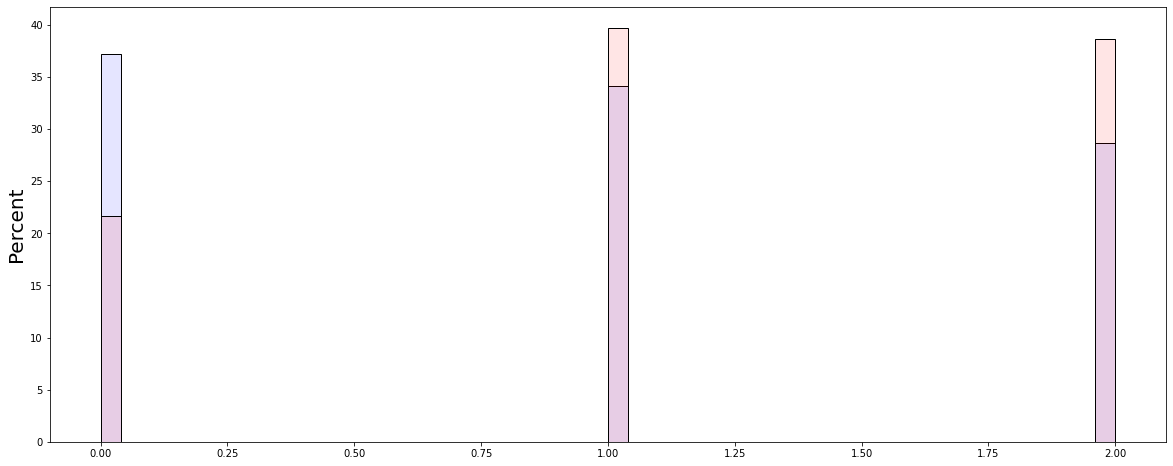

In [60]:
alpha=0.1
sns.histplot(y_pred, color='blue', bins=50, stat='percent', alpha=alpha);
sns.histplot(y_prod_pred, color='red', bins=50, stat='percent', alpha=alpha);

In [61]:
result = jensenshannon_stat_test(pd.Series(y_pred), pd.Series(y_prod_pred), 'cat', threshold=None)
result

StatTestResult(drift_score=0.12293262401397793, drifted=True, actual_threshold=0.1)

In [62]:
assert result.drifted

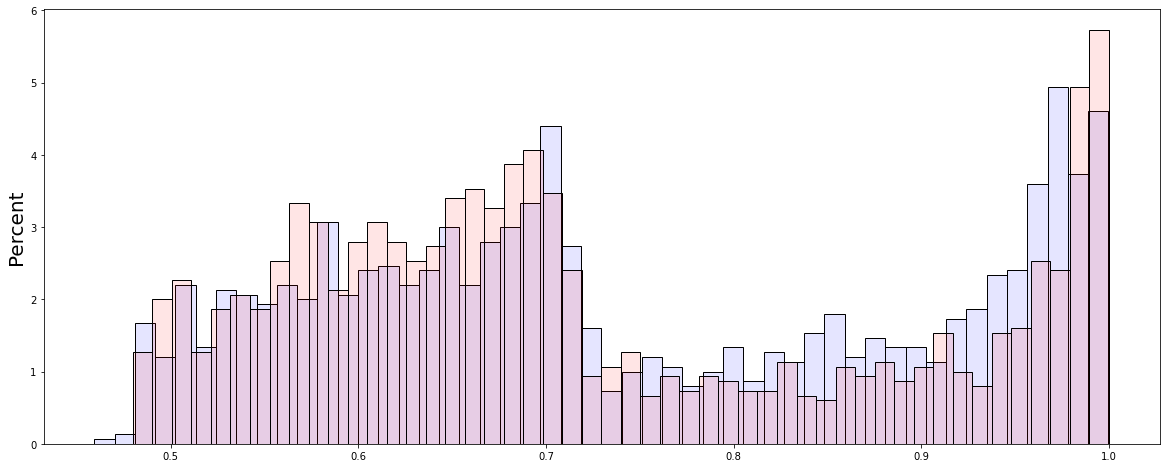

In [63]:
alpha=0.1
sns.histplot(y_pred_probas, color='blue', bins=50, stat='percent', alpha=alpha);
sns.histplot(y_prod_pred_probas, color='red', bins=50, stat='percent', alpha=alpha);

In [64]:
# result = ks_stat_test(pd.Series(y_pred_probas), pd.Series(y_prod_pred_probas), 'num', threshold=None)
# Wasserstein seems to better reflect our intuition here 
result = wasserstein_stat_test(pd.Series(y_pred_probas), pd.Series(y_prod_pred_probas), 'num', threshold=None)
result

StatTestResult(drift_score=0.14769932452746057, drifted=True, actual_threshold=0.1)

In [65]:
assert result.drifted

# Pre Processing - TODO - extend to all variables

Is the data feed into the model in the accepted range? Range is what has been covered by training data at all

In [66]:
age_range=range(10, 150)
power_range=range(50, 250)
def check_range(age, power):
    return age in age_range and power in power_range

In [67]:
assert check_range(age=30, power=150)

In [68]:
assert check_range(age=130, power=350) == False

# Post Processing

* are we certain enough, i.e. is the proba above a certain threshold? 
* if not fall back onto very simple rule system
* rule system should have very high bias (underfit), but should be pretty robust to changes in input 

In [69]:
LOW_RISK = 2
MEDIUM_RISK = 1
HIGH_RISK = 0

class ClassifierBase:
    def predict(self, X):
        return np.array([ self.predict_single(x) for x in X])
    def score(self, X, y):
        n = len(y)
        correct = 0
        predictions = self.predict(X)
        for prediction, ground_truth in zip(predictions, y):
            if prediction == ground_truth:
                correct = correct + 1
        return correct / n

In [70]:
from random import randrange

class RandomClassifier(ClassifierBase):
    def predict_single(self, x):
        return randrange(3)
base_clf = RandomClassifier()    
base_clf.score(X, y)        

0.32133333333333336

In [71]:
# just return most frequent value might be a baseline
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([465, 389, 346]))

In [72]:
class NaiveClassifier(ClassifierBase):
    def predict_single(self, x):
        return HIGH_RISK
base_clf = NaiveClassifier()    
base_clf.score(X, y)    

0.3873333333333333

In [73]:
df.columns

Index(['training', 'age', 'emergency_breaking', 'braking_distance', 'power',
       'miles', 'risk', 'group_name', 'group'],
      dtype='object')

In [74]:
class BaseLineClassifier(ClassifierBase):
    def predict_single(self, x):
        training, age, emergency_breaking, braking_distance, power, miles = x
#         print(age, power, miles)
        if training: 
            return LOW_RISK
        if age < 30:
            if power > 130:
                return HIGH_RISK
            else:
                return MEDIUM_RISK
        if age > 50:
            return HIGH_RISK
        if emergency_breaking:
            return LOW_RISK
        if miles > 50:
            return HIGH_RISK
        if miles > 30:
            return MEDIUM_RISK
        # default
        return LOW_RISK
base_clf = BaseLineClassifier() 
base_clf.score(X, y)    

0.6026666666666667

# Saving Model

In [75]:
# model.save?

In [76]:
model.save('classifier.h5', save_format='h5')

In [77]:
model.save('classifier', save_format='tf')

INFO:tensorflow:Assets written to: classifier/assets


In [78]:
!ls -l

total 1672
drwxr-xr-x 4 olli olli    4096 Jul 29 13:02 classifier
-rw-r--r-- 1 olli olli  337864 Jul 29 13:02 classifier.h5
-rw-r--r-- 1 olli olli  284380 Jul 29 12:58 classifier.tgz
-rw-r--r-- 1 olli olli 1078315 Jul 29 13:01 exploration.ipynb


In [79]:
!ls -l classifier/

total 352
drwxr-xr-x 2 olli olli   4096 Jul 29 11:19 assets
-rw-r--r-- 1 olli olli  22654 Jul 29 13:02 keras_metadata.pb
-rw-r--r-- 1 olli olli 324881 Jul 29 13:02 saved_model.pb
drwxr-xr-x 2 olli olli   4096 Jul 29 13:02 variables


In [80]:
!tar czvf classifier.tgz ./classifier

./classifier/
./classifier/keras_metadata.pb
./classifier/saved_model.pb
./classifier/assets/
./classifier/variables/
./classifier/variables/variables.index
./classifier/variables/variables.data-00000-of-00001


In [81]:
!ls -l

total 1672
drwxr-xr-x 4 olli olli    4096 Jul 29 13:02 classifier
-rw-r--r-- 1 olli olli  337864 Jul 29 13:02 classifier.h5
-rw-r--r-- 1 olli olli  284383 Jul 29 13:02 classifier.tgz
-rw-r--r-- 1 olli olli 1078315 Jul 29 13:01 exploration.ipynb
